# Employee Turnover 👥
The purpose of this project it's to analyze the turnover rate and identify 
the factors associated with it.

https://www.kaggle.com/datasets/liujiaqi/hr-comma-sepcsv

## What is turnover? 
- Turnover it's the rate at which employees who left a company. High turnover
 can indicate problems with employee satisfaction, poor management, 
 or other issues, while low turnover suggests stability within the workforce.

### Turnover can be categorized into two types:
1. **Involuntary turnover:** it's when the employees are terminated or laid off 
by the company. 
2. **Voluntary turmover:** it's when the employees choose to leave the company. 

In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
dataset = pd.read_csv('HR_comma_sep.csv')
dataset.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
dataset.shape

(14999, 10)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


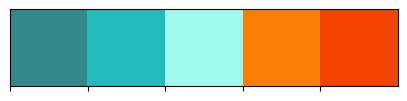

In [17]:
color_palette = ['#348888', '#22BABB', '#9EF8EE', '#FA7F08', '#F24405']
sns.set_palette(sns.color_palette(color_palette))
sns.palplot(sns.color_palette(color_palette))

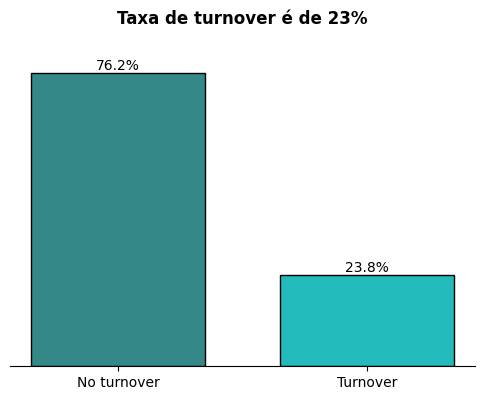

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))

default_grouped = dataset.groupby(['left'])[['left']].count().rename(columns={'left': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

Grafbars = ax.bar(x=default_grouped['left'], height=default_grouped['pct'], 
                  color=color_palette, edgecolor = 'black', width=0.7)
for bar, pct in zip(Grafbars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('Taxa de turnover é de 23%', pad=25, fontweight='bold')
ax.set_xticks(ticks=default_grouped['left'], labels=['No turnover', 'Turnover'])
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

In [19]:
round(dataset['left'].value_counts(normalize=True)*100,2)

left
0    76.19
1    23.81
Name: proportion, dtype: float64

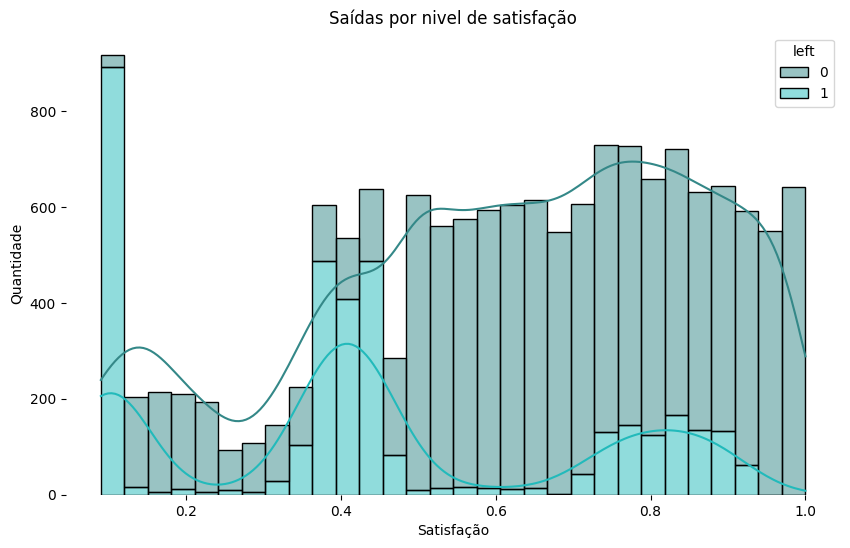

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'satisfaction_level', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Satisfação')
plt.ylabel('Quantidade')
plt.title('Saídas por nivel de satisfação')
plt.show()

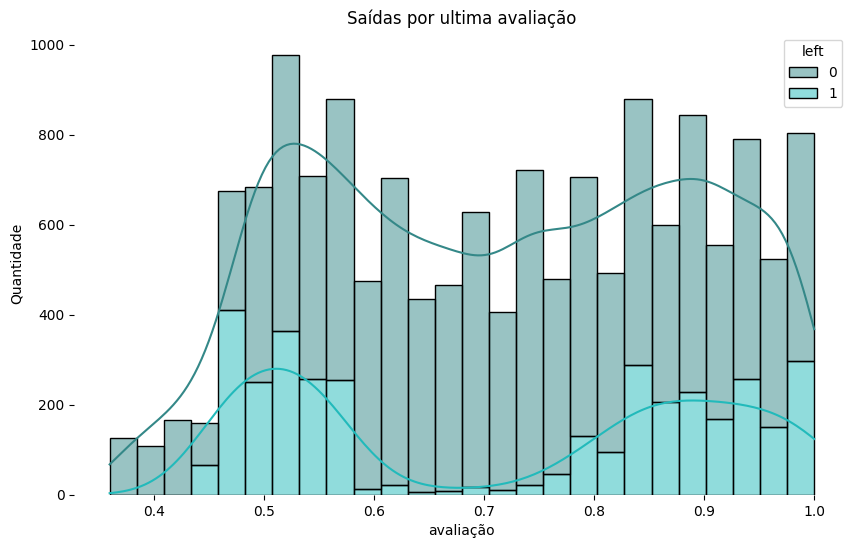

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'last_evaluation', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('avaliação')
plt.ylabel('Quantidade')
plt.title('Saídas por ultima avaliação')
plt.show()

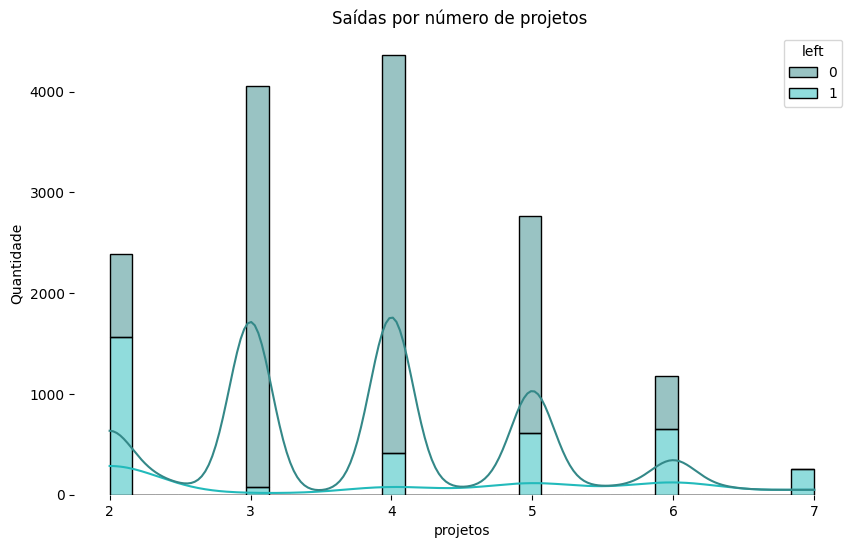

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'number_project', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('projetos')
plt.ylabel('Quantidade')
plt.title('Saídas por número de projetos ')
plt.show()
plt.show()

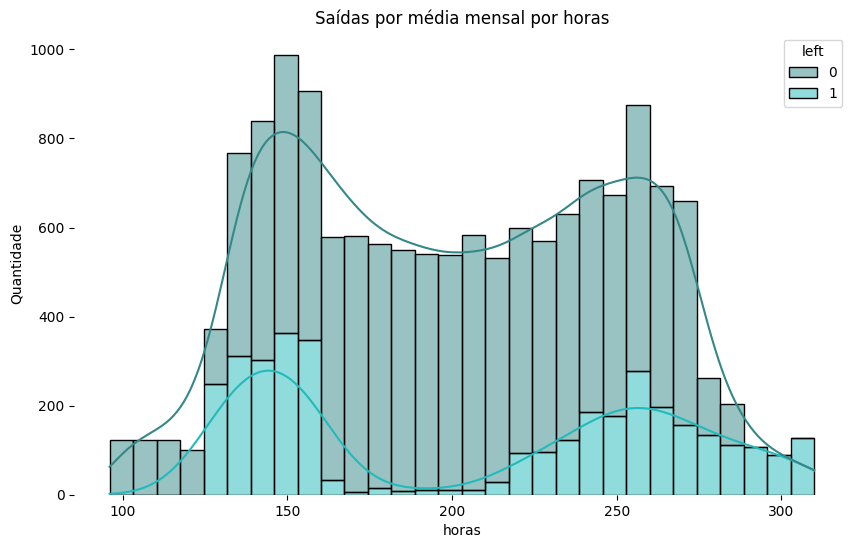

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'average_montly_hours', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('horas')
plt.ylabel('Quantidade')
plt.title('Saídas por média mensal por horas')
plt.show()

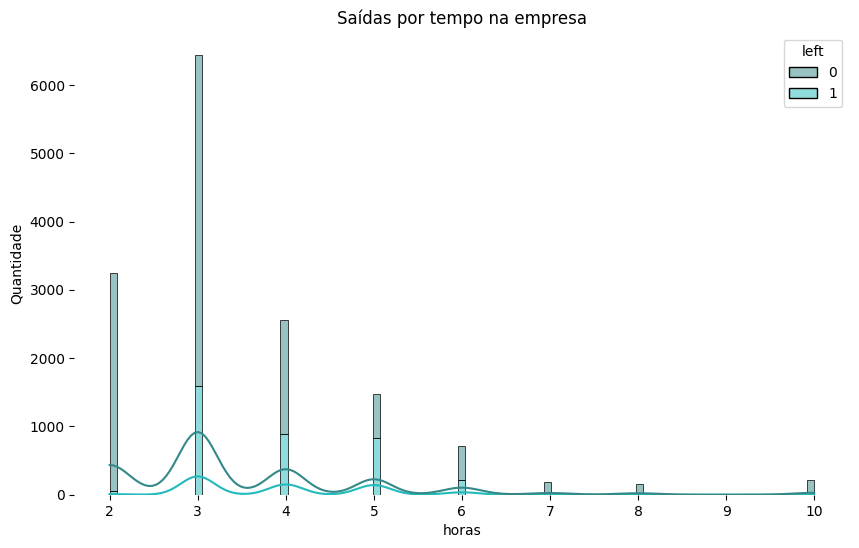

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'time_spend_company', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('horas')
plt.ylabel('Quantidade')
plt.title('Saídas por tempo na empresa')
plt.show()

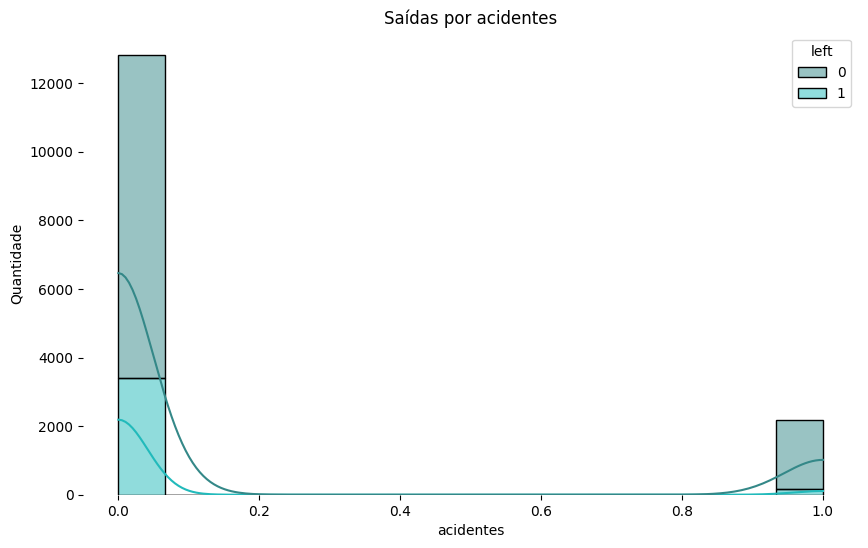

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Work_accident', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('acidentes')
plt.ylabel('Quantidade')
plt.title('Saídas por acidentes')
plt.show()

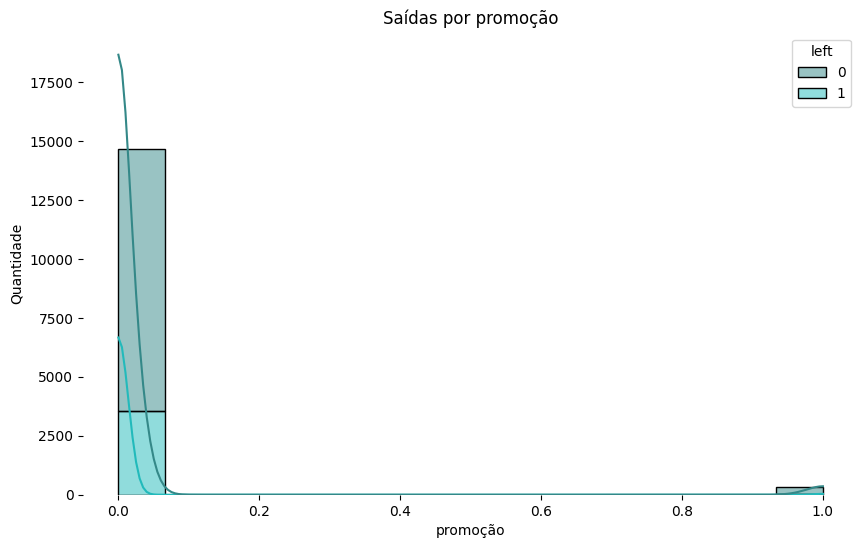

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'promotion_last_5years', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('promoção')
plt.ylabel('Quantidade')
plt.title('Saídas por promoção')
plt.show()

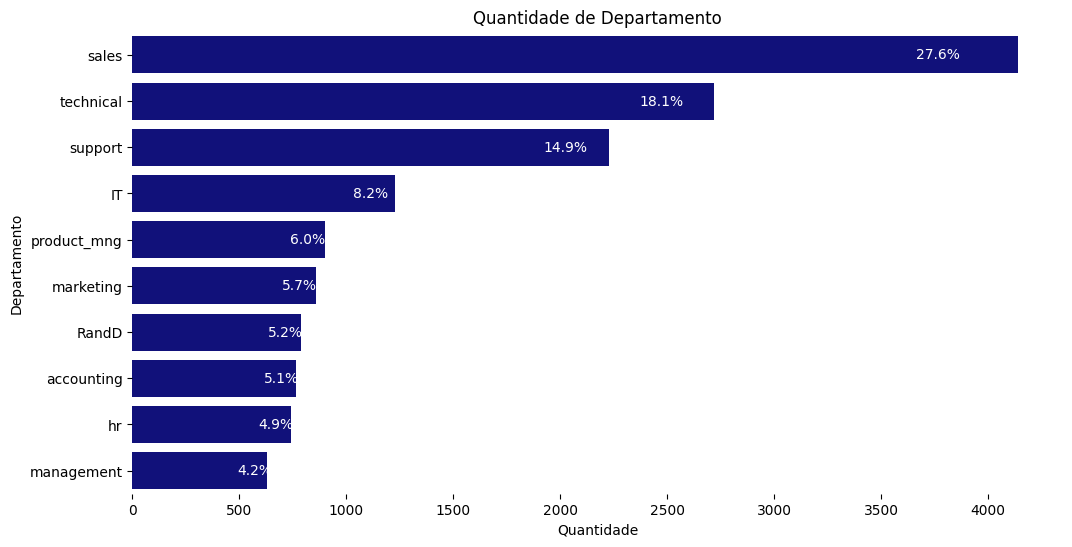

In [60]:
quant = dataset['Department'].value_counts().reset_index()
quant.columns = ['Department', 'quantidade']


fig, ax = plt.subplots(figsize=(12,6))
plot = sns.barplot(quant, x='quantidade',y='Department', color='darkblue', legend=False)
for p in ax.patches:
    width = p.get_width()
    plot.text(width/1.10, 
            p.get_y() + p.get_height() / 2,
            f'{width / quant["quantidade"].sum() * 100:.1f}%',  # Porcentagem com uma casa decimal
            ha='center', va='center', color = 'white')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlabel('Quantidade')
plt.ylabel('Departamento')
plt.title('Quantidade de Departamento')
plt.show()

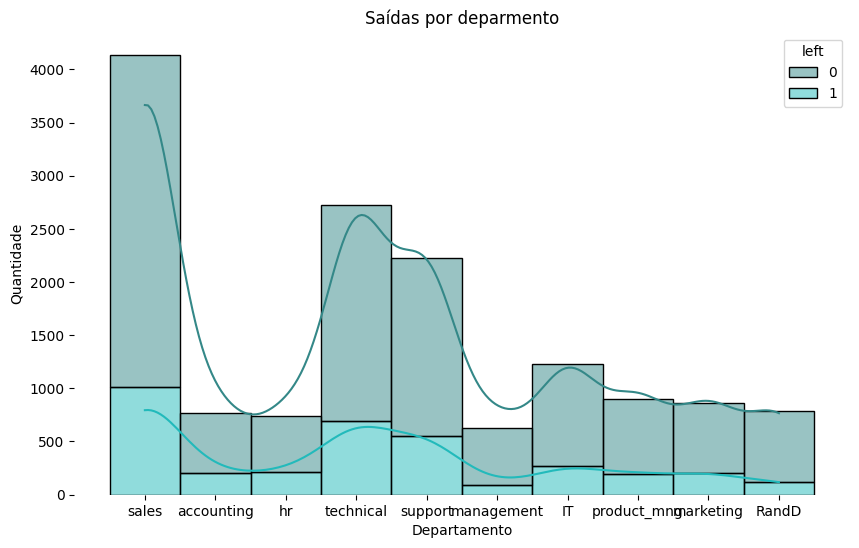

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Department', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Departamento')
plt.ylabel('Quantidade')
plt.title('Saídas por deparmento')
plt.show()

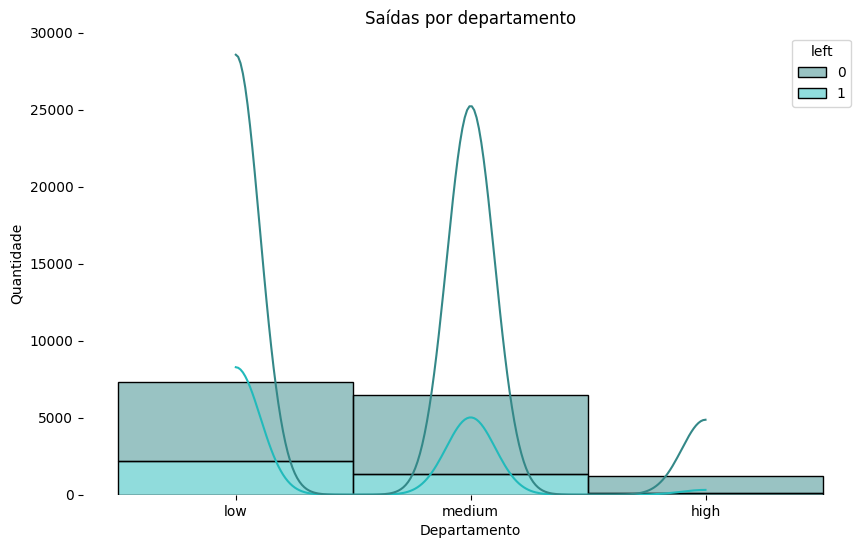

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'salary', hue = 'left', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Departamento')
plt.ylabel('Quantidade')
plt.title('Saídas por departamento')
plt.show()

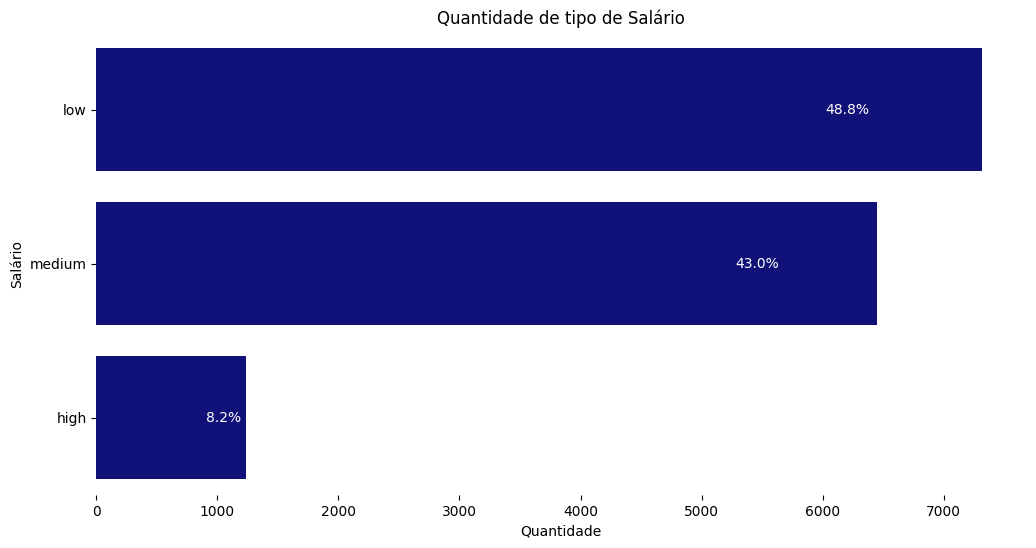

In [57]:
quant = dataset['salary'].value_counts().reset_index()
quant.columns = ['salary', 'quantidade']


fig, ax = plt.subplots(figsize=(12,6))
plot = sns.barplot(quant, x='quantidade',y='salary', color='darkblue', legend=False)
for p in ax.patches:
    width = p.get_width()
    plot.text(width/1.18, 
            p.get_y() + p.get_height()/2,
            f'{width / quant["quantidade"].sum() * 100:.1f}%',  # Porcentagem com uma casa decimal
            ha='center', va='center', color = 'white')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlabel('Quantidade')
plt.ylabel('Salário')
plt.title('Quantidade de tipo de Salário')
plt.show()

In [61]:
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        values = dataset[col].value_counts()
        values = dict(values)

        print(str(col))
        label = LabelEncoder()
        label = label.fit(dataset[col])
        dataset[col] = label.transform(dataset[col].astype(str))

        new_values = dataset[col].value_counts()
        new_values = dict(new_values)

        value_dict = {}
        i = 0
        for key in values:
            value_dict[key] = list(new_values)[i]
            i += 1
            print(value_dict)
dataset.head()

Department
{'sales': 7}
{'sales': 7, 'technical': 9}
{'sales': 7, 'technical': 9, 'support': 8}
{'sales': 7, 'technical': 9, 'support': 8, 'IT': 0}
{'sales': 7, 'technical': 9, 'support': 8, 'IT': 0, 'product_mng': 6}
{'sales': 7, 'technical': 9, 'support': 8, 'IT': 0, 'product_mng': 6, 'marketing': 5}
{'sales': 7, 'technical': 9, 'support': 8, 'IT': 0, 'product_mng': 6, 'marketing': 5, 'RandD': 1}
{'sales': 7, 'technical': 9, 'support': 8, 'IT': 0, 'product_mng': 6, 'marketing': 5, 'RandD': 1, 'accounting': 2}
{'sales': 7, 'technical': 9, 'support': 8, 'IT': 0, 'product_mng': 6, 'marketing': 5, 'RandD': 1, 'accounting': 2, 'hr': 3}
{'sales': 7, 'technical': 9, 'support': 8, 'IT': 0, 'product_mng': 6, 'marketing': 5, 'RandD': 1, 'accounting': 2, 'hr': 3, 'management': 4}
salary
{'low': 1}
{'low': 1, 'medium': 2}
{'low': 1, 'medium': 2, 'high': 0}


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


<Axes: >

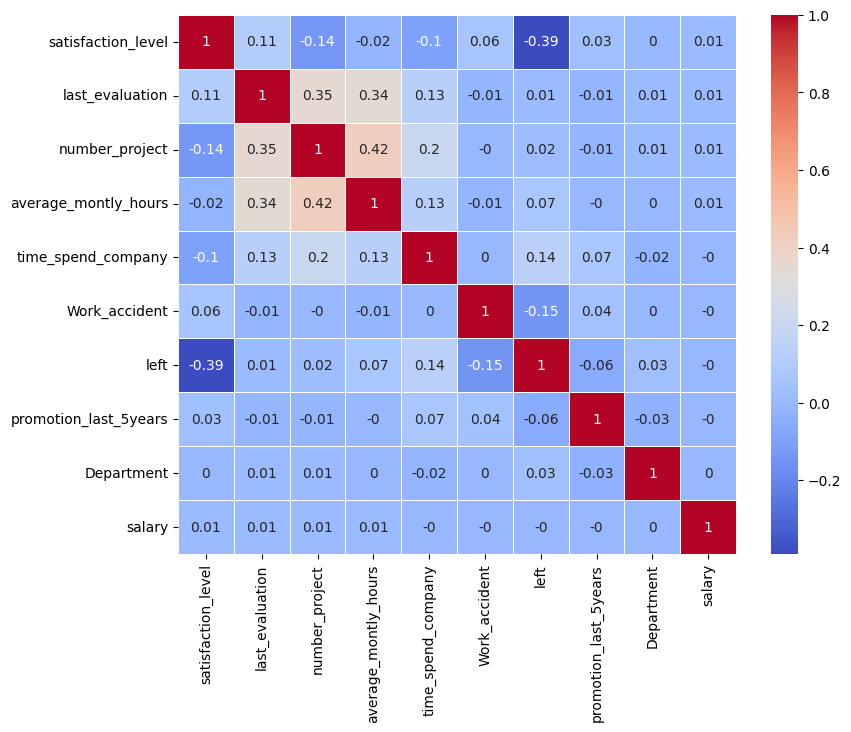

In [62]:
df_corr = dataset.corr().round(2)
fig, ax = plt.subplots(figsize = (9,7))
sns.heatmap(data = df_corr, annot = True, linewidths=.5, ax=ax, cmap='coolwarm' )

In [77]:
correlations = dataset.corr(method='pearson')['left'].drop('left')
correlations_percent = correlations * 100
sorted_correlations = correlations_percent.abs().sort_values(ascending=False)
for feature, correlation in sorted_correlations.items():
    print(f'{feature}: {correlation:.2f}%')

satisfaction_level: 38.84%
Work_accident: 15.46%
time_spend_company: 14.48%
average_montly_hours: 7.13%
promotion_last_5years: 6.18%
Department: 3.21%
number_project: 2.38%
last_evaluation: 0.66%
salary: 0.13%


- Podemos observar que a variável de maior correlação com a saída dos funcionário
é a variável "satisfaction_level" com 38.8%. Isso mostra que, à medida em que não há
uma satisfação dos funcionário, a probabilidade de saída aumenta, ou seja, funcionário
menos satisfeitos tendem a deixar a empresa. 
- A variável "Work_accident" com 15.4% de correlação com a saída indica que há 
uma relação moderada entre a ocorrência de acidentes de trabalho e a probabilidade 
de os funcionários deixarem a empresa.

In [63]:
x = dataset[['satisfaction_level','last_evaluation', 'number_project', 'time_spend_company','Work_accident', 
             'promotion_last_5years', 'Department', 'salary']]
y = dataset['left']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y, random_state=42)

In [64]:
print(x_train.shape, x_test.shape)

(10499, 8) (4500, 8)


In [65]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [66]:
def roda_modelo(modelo):
    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    modelo.fit(x_train_escalonado, y_train)
    prob_predic = modelo.predict_proba(x_test_escalonado)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    predicao = modelo.predict(x_test_escalonado)
    print("\n Classification Report")
    print(classification_report(y_test, predicao))

    print("\n Roc Curve \n")
    y_pred_probs = modelo.predict_proba(x_test_escalonado)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)

    plt.figure(figsize = (8,6))
    plt.plot(fpr, tpr, color = 'purple', label = f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], color='black', linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    y_pred = (y_pred_probs > 0.5).astype(int)

AUC 0.7955519721254888

 Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3429
           1       0.51      0.26      0.34      1071

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.76      0.73      4500


 Roc Curve 



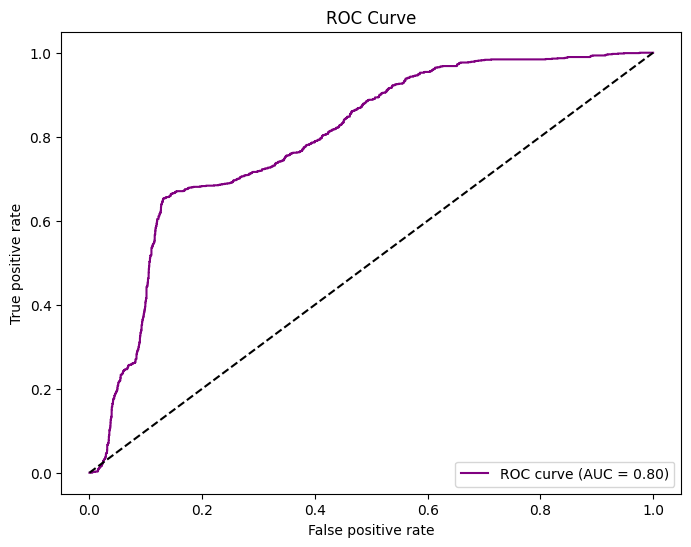

In [67]:
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

AUC 0.9691490088793367

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3429
           1       0.88      0.93      0.90      1071

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500


 Roc Curve 



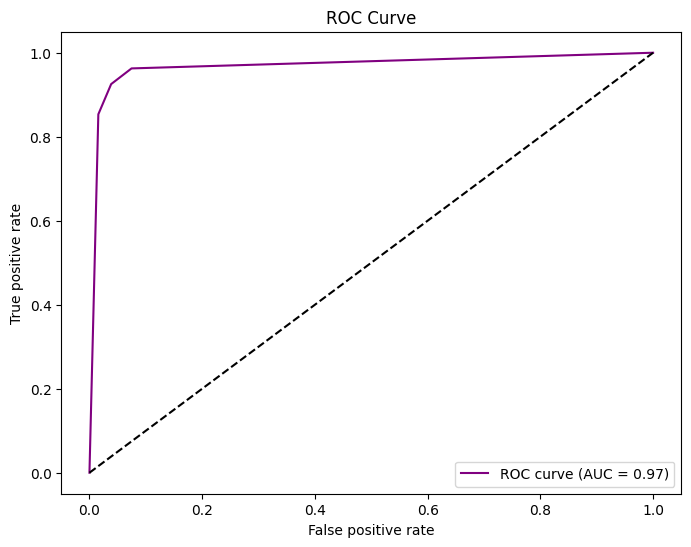

In [70]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn) 

AUC 0.9837252097300475

 Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3429
           1       0.97      0.91      0.94      1071

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500


 Roc Curve 



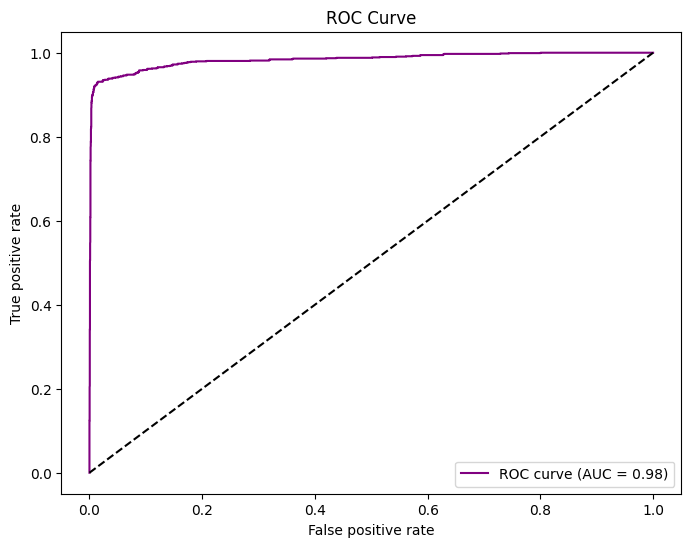

In [71]:
modeo_random_florest = RandomForestClassifier(max_depth=7, n_estimators=100)
roda_modelo(modeo_random_florest)

In [72]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)
grid_search.fit(x_train_escalonado, y_train)
rf_params = grid_search.best_params_
print("Best hyperparameters:", rf_params)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 100}


AUC 0.9908828117618195

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3429
           1       0.98      0.95      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500


 Roc Curve 



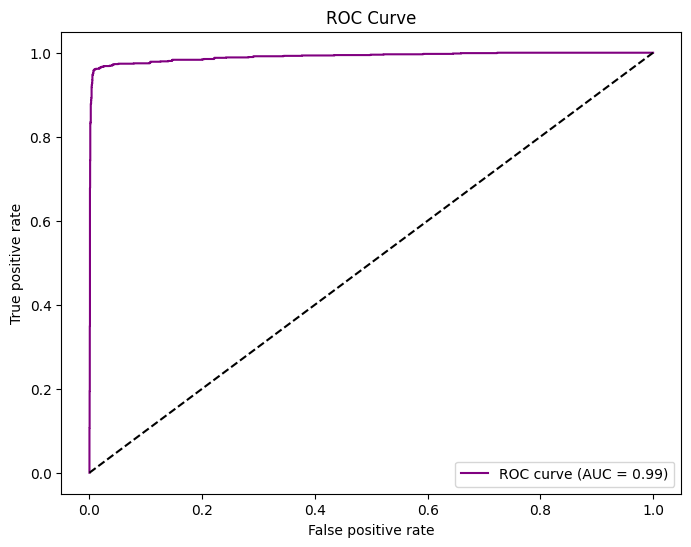

In [73]:
modeo_random_florest_rg = RandomForestClassifier(max_depth=15, n_estimators=300)
roda_modelo(modeo_random_florest_rg)

In [75]:
feature_labels = np.array(['satisfaction_level','last_evaluation', 'number_project', 'time_spend_company','Work_accident', 
             'promotion_last_5years', 'Department', 'salary'])
importance = modeo_random_florest.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}- {:.2f}%'.format(feature_labels[index], (importance[index]*100.0)))

promotion_last_5years- 0.11%
Department- 0.43%
salary- 1.05%
Work_accident- 1.18%
last_evaluation- 12.48%
time_spend_company- 21.39%
number_project- 23.94%
satisfaction_level- 39.41%
